## Predictive ML Project

- Author: [Jacob Sanders](https://github.com/mrjsanders/)
- Repository: [datafun-07-ml](https://github.com/mrjsanders/datafun-07-ml/)


In [3]:
# Imports

# Force working directory to project root
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

os.chdir("C:/Repos/datafun-07-ml")
print(os.getcwd())

C:\Repos\datafun-07-ml


In [4]:
## Part 1 - Chart a Straight Line

## Create Celsius Values
celsius = np.arange(0, 101, 10)

## Convert to Fahrenheit using y = mx + b
## m = 9/5 (slope)
## b = 32  (y-intercept)

fahrenheit = ((9 / 5) * celsius) + 32

## Create a DataFrame

temps_df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})

temps_df.head()

,Celsius,Fahrenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0


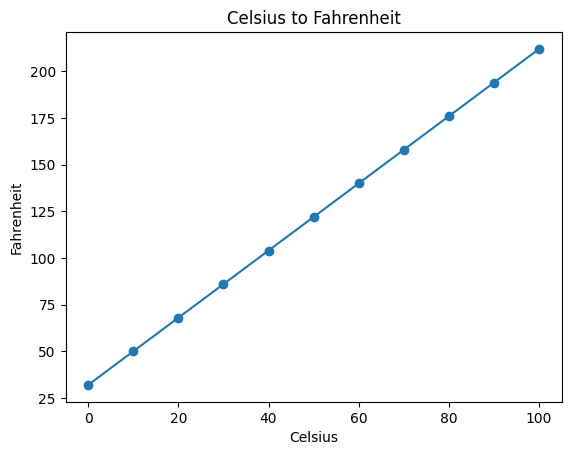

In [5]:
temps_df.plot(
    x='Celsius',
    y='Fahrenheit',
    title='Celsius to Fahrenheit',
    legend=False,
    marker='o',  # <-- This shows the data points
)

plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

In [6]:
## Part 2: Prediction

## Section 1: Data Acquisition
## Load the data from the CSV file
nyc_df = pd.read_csv('data/nyc_df.csv')

nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [7]:
## Section 2: Data Inspection

nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [8]:
## Section 3: Data Cleaning

nyc_df = nyc_df.iloc[:, :2]
nyc_df.columns = ['Date', 'Temp']

## Extract just the year

nyc_df['Year'] = nyc_df['Date'].astype(str).str[:4].astype(int)

nyc_df.head()

,Date,Temp,Year
0,189501,34.2,1895
1,189601,34.7,1896
2,189701,35.5,1897
3,189801,39.6,1898
4,189901,36.4,1899


In [9]:
## Section 4: Descriptive Statistics

pd.set_option('display.precision', 2)
nyc_df.describe()

,Date,Temp,Year
count,124.00,124.00,124.00
mean,195651.00,37.60,1956.50
std,3593.98,4.54,35.94
min,189501.00,26.10,1895.00
25%,192576.00,34.58,1925.75
50%,195651.00,37.60,1956.50
75%,198726.00,40.60,1987.25
max,201801.00,47.60,2018.00


In [10]:
## Section 5: Build the Model

linear_regression = stats.linregress(nyc_df['Year'], nyc_df['Temp'])

linear_regression

LinregressResult(slope=np.float64(0.014771361132966163), intercept=np.float64(8.694993233674289), rvalue=np.float64(0.1169376670075292), pvalue=np.float64(0.19586679787456185), stderr=np.float64(0.011357855112603288), intercept_stderr=np.float64(22.22536216679513))

In [11]:
slope = linear_regression.slope
intercept = linear_regression.intercept

print(f"Slope (m): {slope:.4f}")
print(f"Intercept (b): {intercept:.2f}")

Slope (m): 0.0148
Intercept (b): 8.69


In [12]:
## Section 6: Make Predictions

prediction_year_2024 = slope * 2024 + intercept
print(f"Predicted average temperature for NYC in 2024: {prediction_year_2024:.2f}°F")

Predicted average temperature for NYC in 2024: 38.59°F


<module 'matplotlib.pyplot' from 'c:\\Repos\\datafun-07-ml\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

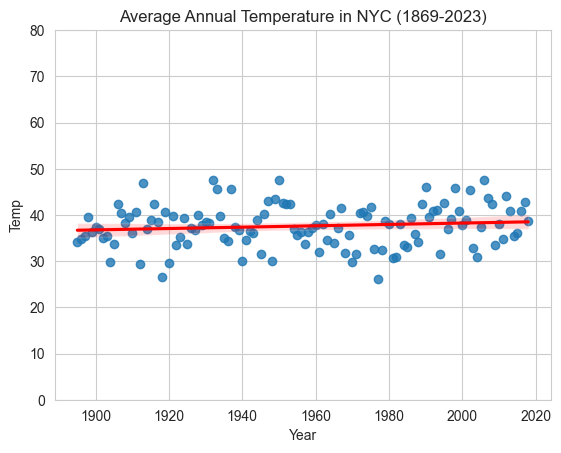

In [13]:
## Section 7: Visualize the Results

sns.set_style('whitegrid')

sns.regplot(x='Year', y='Temp', data=nyc_df, line_kws={'color': 'red'})

plt.ylim(0, 80)
plt.title('Average Annual Temperature in NYC (1869-2023)')
plt

In [ ]:
# Part 6: Prediction

## Section 1: Build the Model with Scikit-Learn

x = nyc_df[['Year']]
y = nyc_df['Temp']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=11)

print(x_train.shape)
print(x_test.shape)

(93, 1)
(31, 1)


In [15]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
m = linear_regression_model.coef_[0]
b = linear_regression_model.intercept_

print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.2f}")

Slope (m): 0.0194
Intercept (b): -0.31


In [17]:
## Section 2: Test the Model

prediction = linear_regression_model.predict(x_test)

pd.DataFrame({'Actual': y_test, 'Predicted': prediction}).head()

,Actual,Predicted
73,31.7,37.86
2,35.5,36.48
77,40.5,37.93
9,29.8,36.61
16,40.7,36.75


In [18]:
## Section 3: Prediction

prediction_year_2024 = linear_regression_model.predict(pd.DataFrame({'Year': [2024]}))

print(f"Predicted average temperature for NYC in 2024: {prediction_year_2024[0]:.2f}°F")

Predicted average temperature for NYC in 2024: 38.94°F


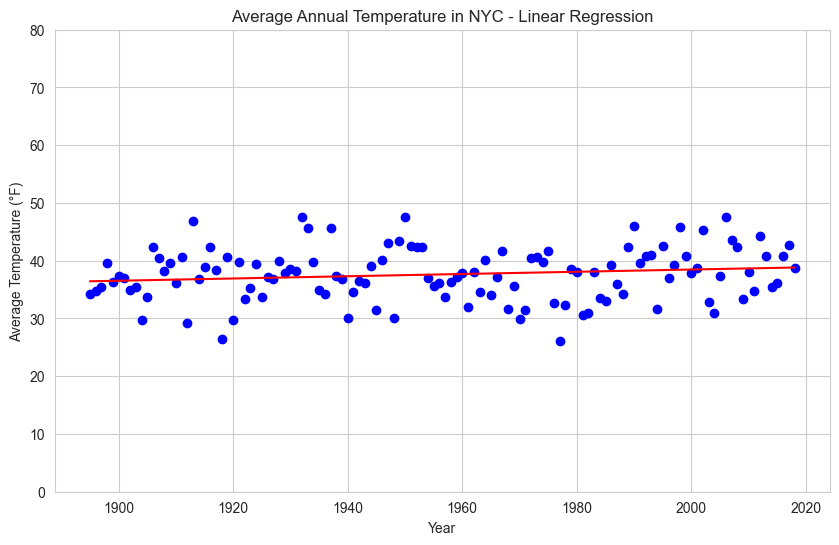

In [19]:
## Section 4: Data Visualization

nyc_df = nyc_df.sort_values('Year')

predicted_line = linear_regression_model.predict(nyc_df[['Year']])

plt.figure(figsize=(10, 6))

plt.scatter(nyc_df['Year'], nyc_df['Temp'], label='Actual Data', color='blue')
plt.plot(nyc_df['Year'], predicted_line, label='Regression Line', color='red')

plt.ylim(0, 80)
plt.title('Average Annual Temperature in NYC - Linear Regression')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.show()

Part 4: Conclusions  

This project displayed two different ways for predicting temperature through linear regression.  
Both model produced different equations for the the linear regression models.  
Weather predictions are difficult, no one gets it right all the time.  Comparing the two models can be useful to see what similarities and differences they have in order to produce more accurate results.

## Section 9. Reminder: Run All before sending to GitHub

Before saving a notebook (and running git add-commit-push), click 'Run All' to generate all outputs and display them in the notebook. 

This is a Markdown cell.
